# Homework 02: Datasets and Encoding

### Instructions for Submitting Names in Notebooks

Please follow the format below when typing your names in the notebook. 

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**

#### Example:
    Poe, Edgar Allan

> ⚠️ **Failure to follow this format will result in a reduction of your grade.**

Belieu, Joshua Alan

## Part 1. Visualization (10 points)

Let's continue our journey into learning about visualization. 

One of the main goals now is to learn to take control of your visualizations. Since most people start with <code>matplotlib</code>, let's explore this a bit.

You may not be that familiar with coding to make your plots. Perhaps you have always used the "canned" plots in something like Excel. Nothing wrong with using tools already ready for you to use; however, in data science in particular, we often need to take control over what we are doing because of the extremely diverse set of issues that arise. 

First, let's explore just a very few things that are possible, and give you some code to borrow from later in the course.

🗒️ **Task:** Your first task is to read this code, comment it and make sure you understand how each plot was made so that you can do it yourself next time. 


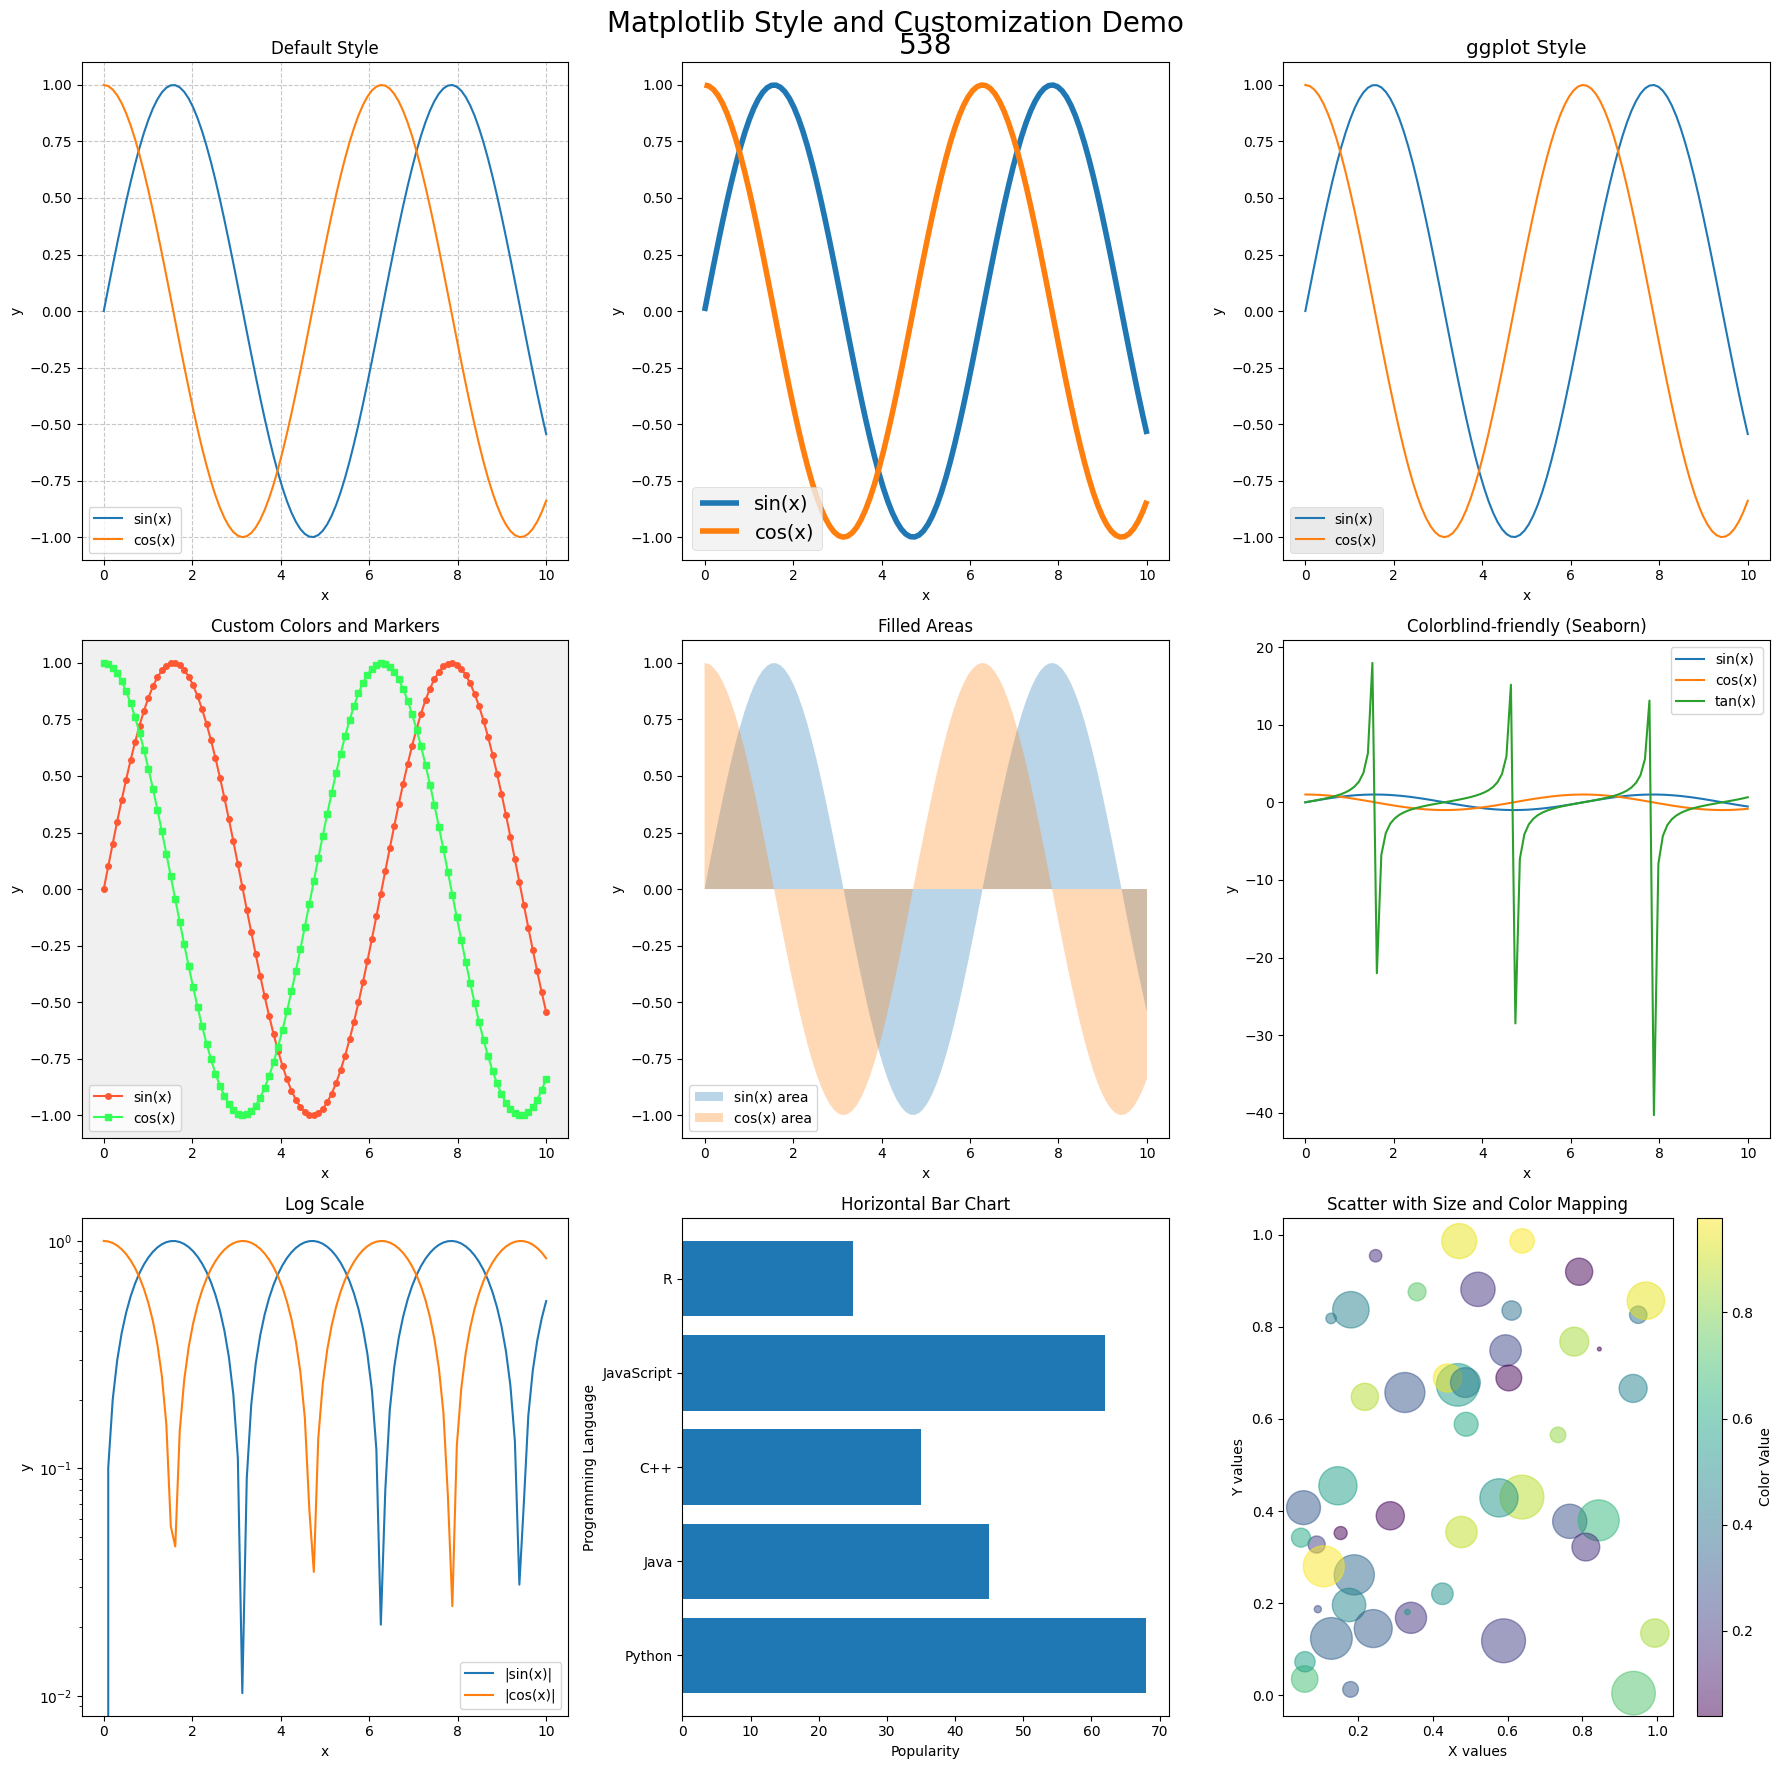

In [1]:
'''
imported libraries
'''

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from cycler import cycler

'''
sample data
'''

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

'''
plot instance
'''

# Create a 3x3 grid of subplots with different styles
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Matplotlib Style and Customization Demo', fontsize=20)

# Function to set common properties for all subplots
def set_common_properties(ax, title):
    '''
    inputs :
    ------
    ax    : Axes class instance. this will be one of the nine plots on the
             grid.
    title : string. plot title.

    outputs : None. the subplot is given a title, axis labels, and legend.
    '''
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

'''
plot 1 will show a default style and we assign it to the '00' slot in the 3x3
grid. we are plotting y1 (sine) and ys (cosine) against x. the 
set_common_properties is used and a grid is painted on via the True bool. the
grid is customized with a dashed-line style and a opacity of 0.7 from the
alpha parameter.
'''

# Plot 1: Default style
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].plot(x, y2, label='cos(x)')
set_common_properties(axs[0, 0], 'Default Style')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

'''
plt.style.context is a routine that enforces the passed style to the plotting
commands nested in it's code block. code structure is similar to plot 1 except
we store plot 2 at the '01' slot.
'''

# Plot 2: Seaborn style
with plt.style.context('fivethirtyeight'):
    axs[0, 1].plot(x, y1, label='sin(x)')
    axs[0, 1].plot(x, y2, label='cos(x)')
    set_common_properties(axs[0, 1], '538')

'''
similar report as to plot 2. here the plot is stored at the '02' block.
'''

# Plot 3: ggplot style
with plt.style.context('ggplot'):
    axs[0, 2].plot(x, y1, label='sin(x)')
    axs[0, 2].plot(x, y2, label='cos(x)')
    set_common_properties(axs[0, 2], 'ggplot Style')

'''
at the '10' slot we are exploring the use of color (this accepts hexcodes or 
reserved colors as strings), and marker (what is painted on the plot where a 
datum is placed), markersize (sets the size of the marker).
'''

# Plot 4: Custom colors and markers
axs[1, 0].plot(x, y1, color='#FF5733', marker='o', markersize=4, label='sin(x)')
axs[1, 0].plot(x, y2, color='#33FF57', marker='s', markersize=4, label='cos(x)')
set_common_properties(axs[1, 0], 'Custom Colors and Markers')

'''
set_facrcolor sets the color of the background.
'''

axs[1, 0].set_facecolor('#F0F0F0')

'''
slot '11' uses fill_between which fills the area between two curves. this 
accepts 3 positional arguments (x,y1,y2) and fills between y1 and y2. In both
cases the y2 hyper parameter is 0 (by default).
'''

# Plot 5: Filled areas
axs[1, 1].fill_between(x, y1, alpha=0.3, label='sin(x) area')
axs[1, 1].fill_between(x, y2, alpha=0.3, label='cos(x) area')
set_common_properties(axs[1, 1], 'Filled Areas')

'''
here we set context to a colorblind sensitive pallette. 
'''

# Plot 6: Colorblind-friendly palette
with plt.style.context('seaborn-v0_8-colorblind'):
    # Use the 'colorblind' color cycle from seaborn
    '''
    rcParams : controls plotting parameters
    axes.prop_cycle : how different styles are loaded and applied for other
    keyword arguments.
    cycler : a method that allows customization of properys' cycles.
    cm.set2.colors : this is a color map.

    '''
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

    '''
    zip creates an iterable tuple where we unpacked the arrays and labels and
    plotted them on the '12' slot.
    '''
    
    for y, label in zip([y1, y2, y3], ['sin(x)', 'cos(x)', 'tan(x)']):
        axs[1, 2].plot(x, y, label=label)
    set_common_properties(axs[1, 2], 'Colorblind-friendly (Seaborn)')

'''
the '20' slot is making use of semilogy - a plot with log scaling on the 
y-axis. we are plotting the absolute value of the functions.
'''

# Plot 7: Log scale
axs[2, 0].semilogy(x, np.abs(y1), label='|sin(x)|')
axs[2, 0].semilogy(x, np.abs(y2), label='|cos(x)|')
set_common_properties(axs[2, 0], 'Log Scale')

'''
slot '21' is making a horizontal bar chart where the languages will lie on the
y-axis and the popularity will lie on the x-axis.
'''

# Plot 8: Horizontal bar chart
languages = ['Python', 'Java', 'C++', 'JavaScript', 'R']
popularity = [68, 45, 35, 62, 25]
axs[2, 1].barh(languages, popularity)
axs[2, 1].set_title('Horizontal Bar Chart')
axs[2, 1].set_xlabel('Popularity')
axs[2, 1].set_ylabel('Programming Language')

'''
the last slot, '22', is showcasing the utility of using colorbars and marker
sizes. the data are random arrays of size 50 and are drawn from the normal
distribution with mean 0 and variance 1. colors and sizes are initialized in
a similar manner. 
'''

# Plot 9: Scatter plot with size and color mapping
n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
sizes = 1000 * np.random.rand(n)

scatter = axs[2, 2].scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
axs[2, 2].set_title('Scatter with Size and Color Mapping')
axs[2, 2].set_xlabel('X values')
axs[2, 2].set_ylabel('Y values')
plt.colorbar(scatter, ax=axs[2, 2], label='Color Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

If you have any questions about this code you want covered later in the course, open a markdown cell and let me know what it is. I don't know your <code>matplotlib</code> background, so let me know in a markdown cell! 

Matplotlib is my go to plotting package. Although it is my most common, I find myself still having to go back and read documentation.

What you just did was one step beyond the defaults in <code>matplotlib</code> by using styles. You can find options with <code>plt.style.available</code>: [click here!](https://miro.medium.com/v2/resize:fit:5364/1*QT5UhLX452dXRmfPc1un3Q.png). But, what if a style doesn't quite meet your needs? In fact, how did people make these styles in the first place?! 

Read [this page](https://matplotlib.org/stable/users/explain/customizing.html) and bookmark this link so that you can use it later in the course.

🗒️ **Task:** Let's make our own style!  Again, comment this code. And, also play with the <code>rcParams</code> to see how they change the overall look of the plots. Change sizes of everything, change fonts, etc. Show some exaamples of your work.

There is a lot here to digest if you have not seen this before! Don't worry - do your best and let me know which parts are familiar and which are new to you. 

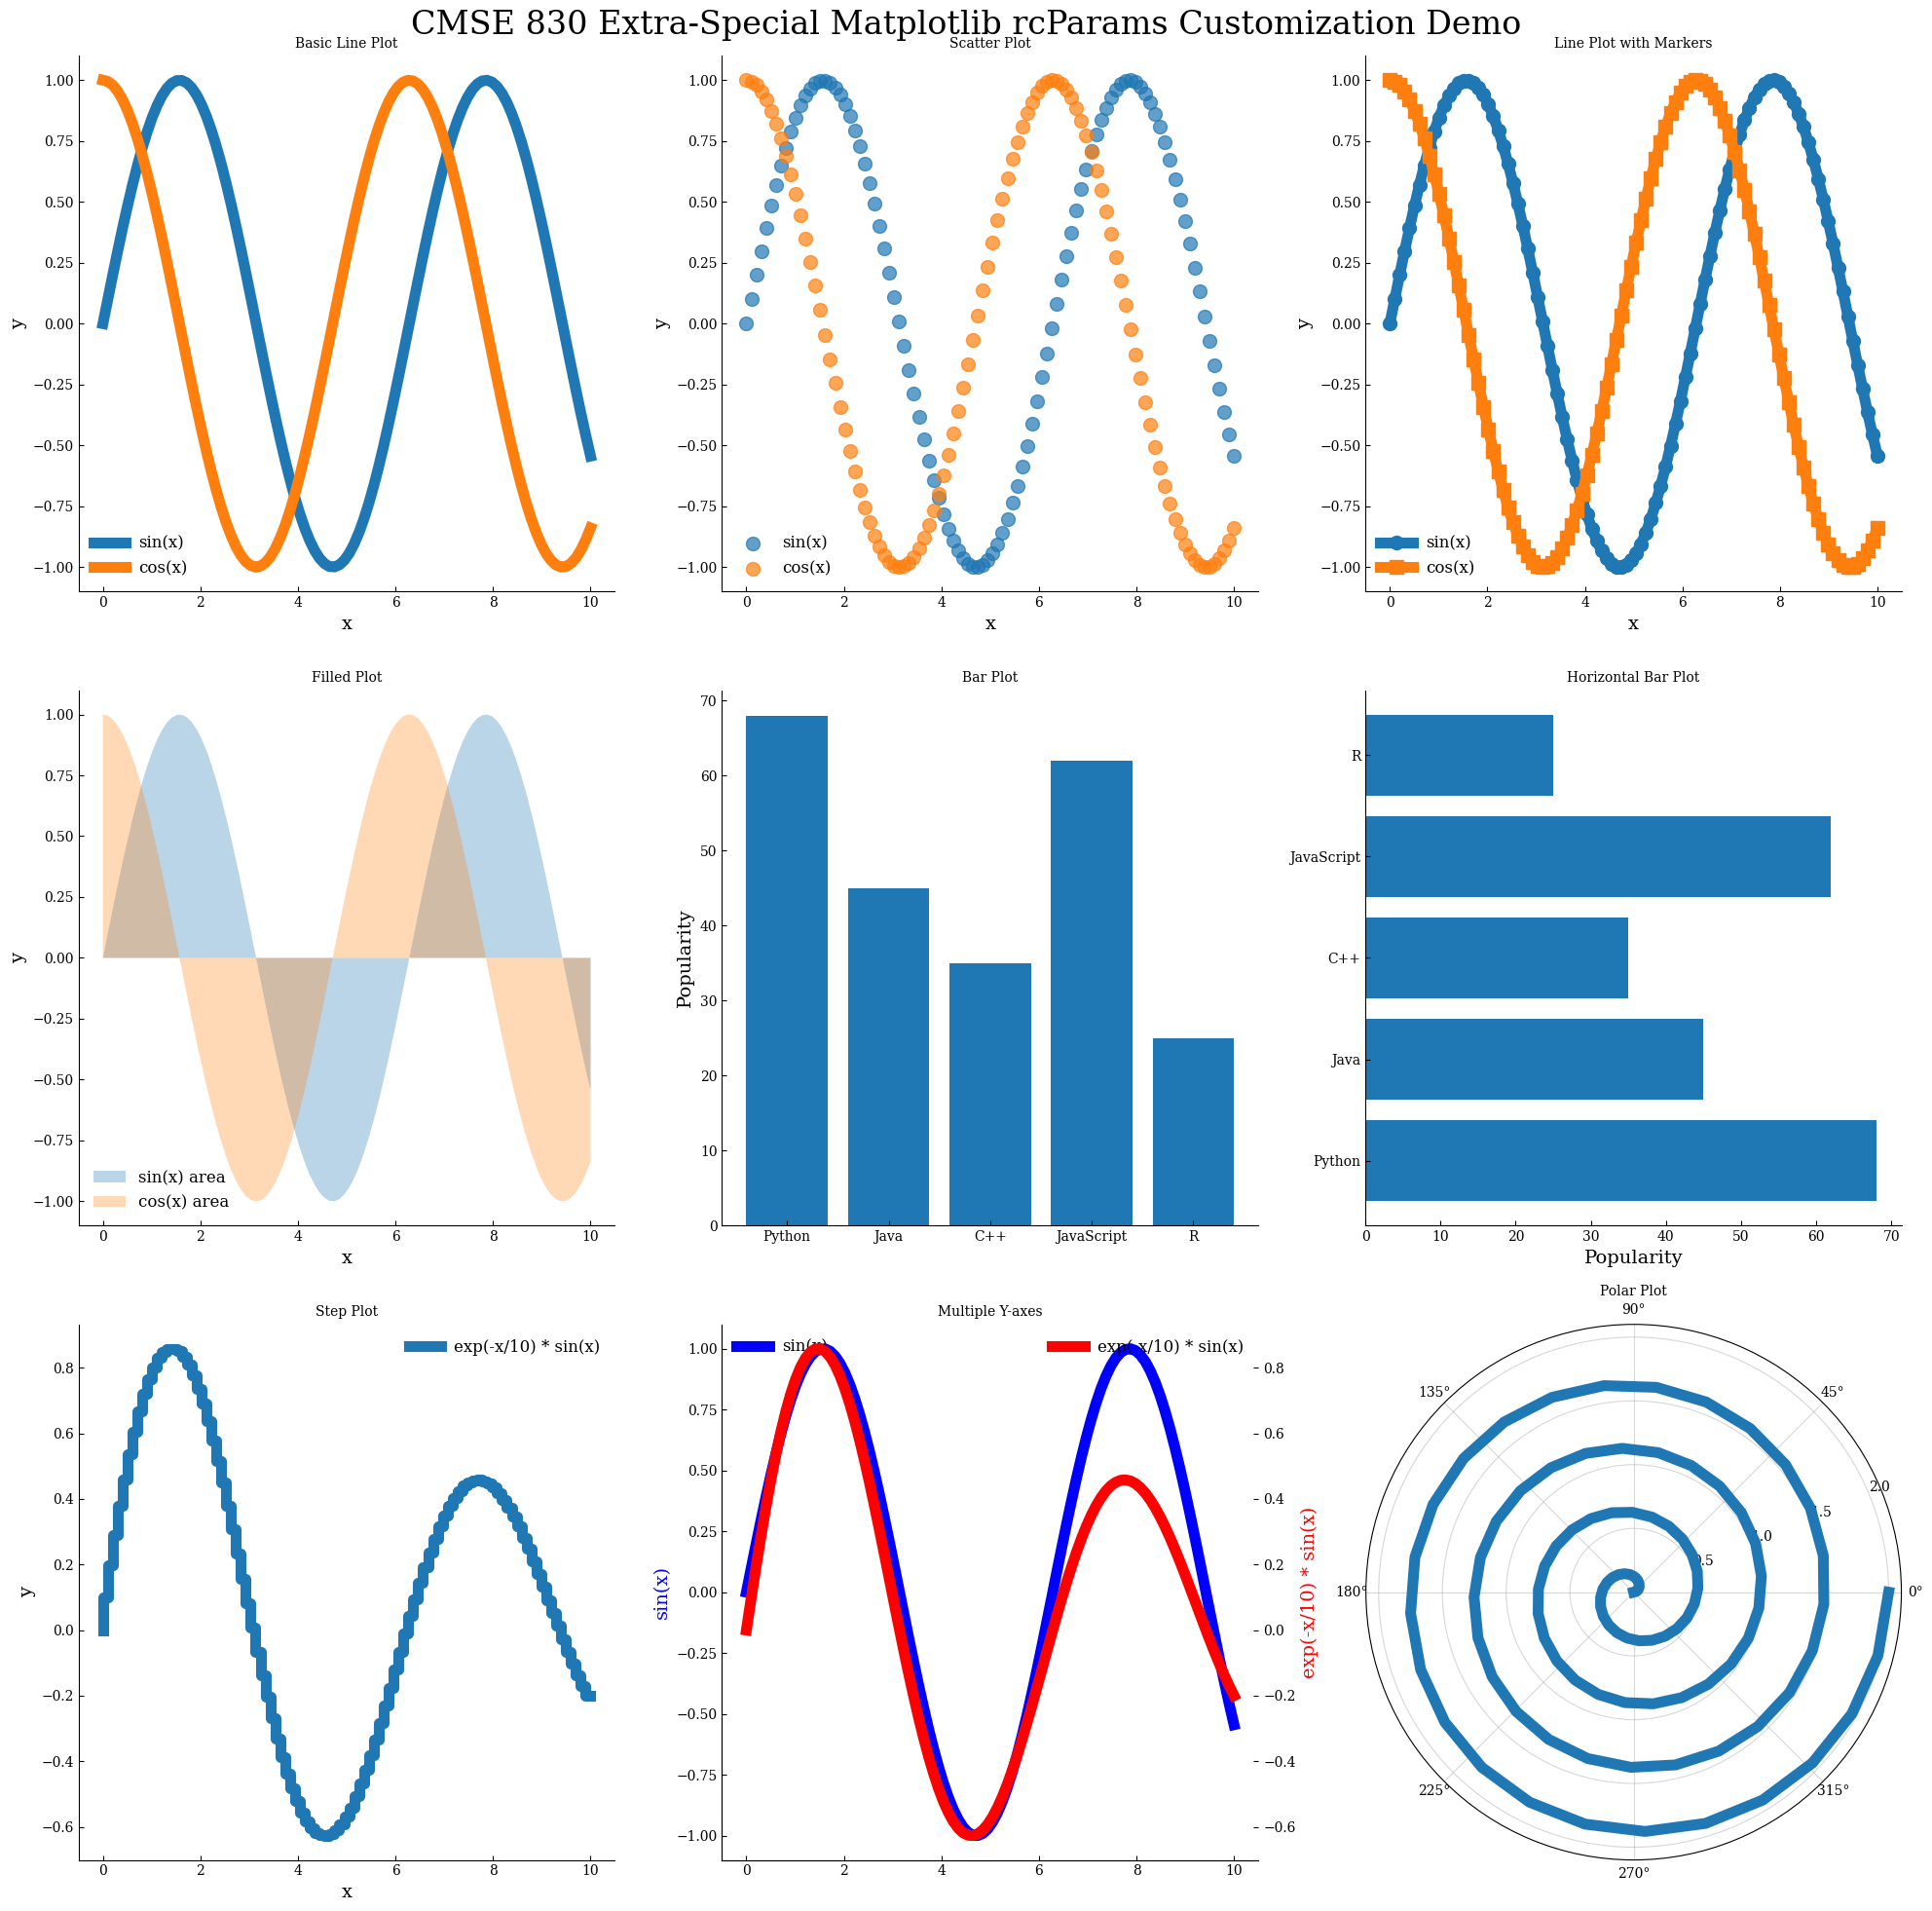

In [2]:
'''
imported libraries.
'''

import numpy as np
import matplotlib.pyplot as plt

'''
customizing plotting parameters.
'''

# Set custom rcParams: compare this to the codes I gave you for the first ICA
plt.rcParams.update({
    # Figure
    'figure.figsize': (4, 10),
    'figure.dpi': 100,
    # Font
    'font.family': 'serif',
    'font.size': 12,
    # Axes
    'axes.titlesize': 10,
    'axes.labelsize': 14,
    'axes.spines.top': False,
    'axes.spines.right': False,
    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    # Legend
    'legend.fontsize': 12,
    'legend.frameon': False,
    # Lines
    'lines.linewidth': 8,
    'lines.markersize': 10,
    # Grid
    'grid.linewidth': 0.8,
    'grid.alpha': 0.5,
    # Color cycle
    'axes.prop_cycle': plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
})

'''
arrays of the independent variable x on the interval [0,10], sine, cosine, and an oscillating damped system.
'''

# Generate sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-x/10) * np.sin(x)

'''
create a 3x3 of plots with a broad title for all.
'''

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('CMSE 830 Extra-Special Matplotlib rcParams Customization Demo', fontsize=24)

'''
same routine as earlier.
'''

# Function to set common properties for all subplots
def set_common_properties(ax, title):
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()

'''
plot sine and cosine with personalized title.
'''

# Plot 1: Basic line plot
axs[0, 0].plot(x, y1, label='sin(x)')
axs[0, 0].plot(x, y2, label='cos(x)')
set_common_properties(axs[0, 0], 'Basic Line Plot')

'''
same as plot 1, but now it is a scatter plot with the opacity turned down.
'''

# Plot 2: Scatter plot
axs[0, 1].scatter(x, y1, label='sin(x)', alpha=0.7)
axs[0, 1].scatter(x, y2, label='cos(x)', alpha=0.7)
set_common_properties(axs[0, 1], 'Scatter Plot')

'''
same as plot 1 but now we paint the datums with the passed marker.
'''

# Plot 3: Line plot with markers
axs[0, 2].plot(x, y1, label='sin(x)', marker='o')
axs[0, 2].plot(x, y2, label='cos(x)', marker='s')
set_common_properties(axs[0, 2], 'Line Plot with Markers')

'''
this is painting the  area between the passed y array and the x-axis. the
opacity is turned way down.
'''

# Plot 4: Filled plot
axs[1, 0].fill_between(x, y1, alpha=0.3, label='sin(x) area')
axs[1, 0].fill_between(x, y2, alpha=0.3, label='cos(x) area')
set_common_properties(axs[1, 0], 'Filled Plot')

'''
bar plot with languages and popularity, slightly different customiztion scheme
so set_common_properties was not used.
'''

# Plot 5: Bar plot
languages = ['Python', 'Java', 'C++', 'JavaScript', 'R']
popularity = [68, 45, 35, 62, 25]
axs[1, 1].bar(languages, popularity)
axs[1, 1].set_title('Bar Plot')
axs[1, 1].set_ylabel('Popularity')

'''
same as plot 5, but transposed.
'''

# Plot 6: Horizontal bar plot
axs[1, 2].barh(languages, popularity)
axs[1, 2].set_title('Horizontal Bar Plot')
axs[1, 2].set_xlabel('Popularity')

'''
make a step plot of the damped oscialltor.
'''

# Plot 7: Step plot
axs[2, 0].step(x, y3, label='exp(-x/10) * sin(x)')
set_common_properties(axs[2, 0], 'Step Plot')

'''
twinx creates the second y-axis that shares the x-axis. then it looks like you
can plot on this new axis. the two y axes are not in sync.
'''

# Plot 8: Multiple y-axes
ax2 = axs[2, 1].twinx()
axs[2, 1].plot(x, y1, 'b-', label='sin(x)')
ax2.plot(x, y3, 'r-', label='exp(-x/10) * sin(x)')
axs[2, 1].set_ylabel('sin(x)', color='b')
ax2.set_ylabel('exp(-x/10) * sin(x)', color='r')
axs[2, 1].set_title('Multiple Y-axes')
axs[2, 1].legend(loc='upper left')
ax2.legend(loc='upper right')

'''
looks like you have to clear the plot slot in order to load in the desired
plot format (polar). 
'''

# Plot 9: Polar plot
axs[2, 2].remove()  # Remove the existing subplot
ax_polar = fig.add_subplot(3, 3, 9, projection='polar')
r = np.linspace(0, 2, 100)
theta = 4 * np.pi * r
ax_polar.plot(theta, r)
ax_polar.set_title('Polar Plot')
ax_polar.set_rticks([0.5, 1, 1.5, 2])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

✏️ **Answer:** Put your reflections and questions in this cell 

The two y-axis plot was interesting. I wonder what the default settings are because the two axes do not have the same ranges, and if that can be changed.

---
## Part 2. AI-Assisted Learning: Correlation (10 points)

Because this HW problem uses AI, be sure to read the AI Policy and carefully follow the instructions there.

🗒️ **Task:** Read Chapter 2 of your textbook. Write a summary of Chapter 2 into your favorite AI. 

* Prompt the AI to expand on your summary and provide you with additional insights. Read these.
* Prompt the AI to create a quiz with 10 multiple choice questions and ask it to grade your answers and provide extra feedback if you miss a question. 
* Think about what you understand least about what you have learned. Tell the AI what you would like to dig into more deeply, and ask for a second quiz on those customized ideas. 

In a markdown cell, write about this learning experience. 

✏️ **Answer:**

I used ChatGPT 5.0, 09.07.25.


First bullet point : The LLM gave finer detail to the points of my summary (definitions, examples, etc.). The portion I was most informed by was this passage, "Forecasting: If one variable is easier to measure or predict, correlation lets us use it as a proxy for another. For instance, economists might use employment numbers to forecast consumer spending." I had not considered the power of leveraging more accessible data to forecast others so explicitly.

Second bullet point : I got 10/10* (the LLM shortened correlation coefficient to correlation which caused minor confusion resulting in an incorrect answer)

Third point : I got 3/5. The LLM began asking me things that I did not know about so I had to guess on some questions.

---

## Part 3. Projects (10 points)

Some of you already know what you want your project to be, but most of you probably haven't thought too much about it. Here, we will do a tiny practice project to get you thinking about the steps.

🗒️ **Task:** In this problem, you will practice finding and working with a real-world dataset, specifically the Palmer Penguins dataset. You'll explore the data, create visualizations, and propose potential research questions or projects. The goal here is to imagine you come up with an idea for your project and you want to get started with it, which begins with finding the data. 

Let's imagine you are very interested in penguins....

#### Instructions

1. **Data Acquisition**

   - Find and download the Palmer Penguins dataset.
   - Document the source of the dataset and the process you used to obtain it.

2. **Dataset Overview**

   Write a brief summary (100-200 words) addressing the following:
   - What is the Palmer Penguins dataset?
   - Who collected this data and for what purpose?
   - What variables are included in the dataset?
   - How many observations does the dataset contain?

3. **Data Utility**

   In another 100-200 words, discuss:
   - What kinds of research questions or analyses is this dataset suitable for?
   - How might this dataset be used in the field of data science or related disciplines?

4. **Exploratory Data Analysis**

   Using Python, perform a basic exploratory data analysis of the Penguins dataset:
   - Create at least two different types of plots that reveal interesting aspects of the data. 
     (e.g., distribution of penguin species, relationship between bill length and bill depth, etc.)
   - For each plot, write a brief description (2-3 sentences) explaining what the visualization shows and any insights it provides.

Remember, the goal is to demonstrate your ability to work independently with a new dataset. _Focus on clear communication of your findings and ideas rather than complex analyses at this stage._

If you are not great and finding and downloading datasets yet, here is a _hint:_ there are many places to find this one, but using the Seaborn library is convenient: <code>import seaborn as sns; penguins = sns.load_dataset("penguins")</code>

Part 3 problem 1 : (below)

In [3]:
import seaborn as sns # I used the hint :3
penguins = sns.load_dataset('penguins')
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Part 3 Problem 2 :

The Palmer Penguins dataset is a collection of measurements and observations of three species of penguins in the Palmer Archipelago. Doctor Kristen Gorman collected this data in association with the Palmer Station Long Term Ecological Research Program. I am sure there are other research reasons and goals for collecting the data but according to the github page for the Palmer Penguins dataset the purpose of the dataset is, “The goal of palmerpenguins is to provide a great dataset for data exploration & visualization, as an alternative to iris.” The variables include species, island, bill length, bill depth, flipper length, body mass, and sex. Each feature has a number of observations that lie somewhere on the interval of 333 to 344. The project page stated that there were 344 penguins.

Part 3 Problem 3 :

This dataset provides an excellent opportunity for data  scientists to develop and test methods that aim to classify entities or identify correlations in a dataset. For the dataset itself, investigating the correlations between the features could illuminate key aspects of the bird species which would help researchers understand them better. For instance, there could be a correlation between bill size and species that could alleviate the identification time of a particular penguin. Alternatively an analysis could help answer questions about how a penguin’s flipper size affects its mass. This dataset would also be of interest to biologists that may be concerned with the population and distribution of penguins in that region.

Part 3 Problem 4 : (Below)


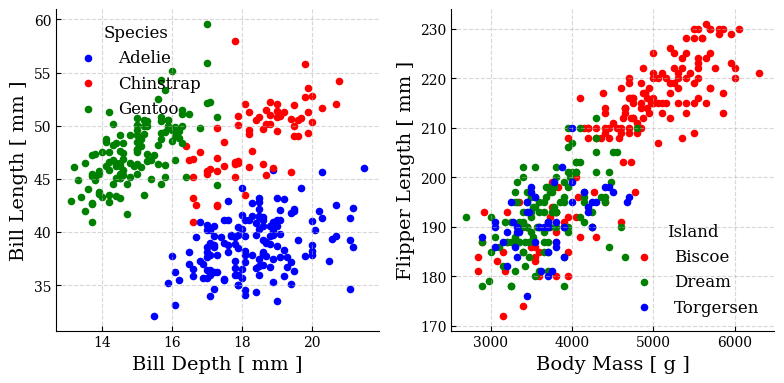

In [4]:
'''
from the data set, grab the first entry of each species and make a dictionary
out of them where the values are colors.
'''

unique_species = penguins['species'].unique()
colors = ['blue', 'red', 'green'] 
species_color_dict = dict(zip(unique_species, colors))

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

'''
the groupby routine is conveniet for ordering the dataset and iterating through
it. this will allow us to color things by species and investigate a possible
correlations between the two selected features. 
'''

for species, group in penguins.groupby('species'):
    axs[0].scatter(
        group['bill_depth_mm'], 
        group['bill_length_mm'], 
        color=species_color_dict[species], 
        label=species,
        s=20)
axs[0].set_xlabel('Bill Depth [ mm ]')
axs[0].set_ylabel('Bill Length [ mm ]')
axs[0].legend(title='Species')
axs[0].grid(ls='--',alpha=0.5)

'''
same structure as ealier, except now grouping by island and investigating two
new features.
'''

unique_islands = penguins['island'].unique()
island_color_dict = dict(zip(unique_islands, colors))

for island, group in penguins.groupby('island'):
    axs[1].scatter(
        group['body_mass_g'], 
        group['flipper_length_mm'], 
        color=island_color_dict[island], 
        label=island,
        s=20)
axs[1].set_xlabel('Body Mass [ g ]')
axs[1].set_ylabel('Flipper Length [ mm ]')
axs[1].legend(title='Island')
axs[1].grid(ls='--',alpha=0.5)

fig.tight_layout()

Plot 1 : Noting the left plot, I have plotted the bill depth and bill length against eachother and I have colored the markers by species. We can see clear clustering in the correlation between bill length and depth between the penguin species. We also see positive linear correlations within each species cluster.

Plot 2 : This plot on the left shows strong linear correlation between body mass and flipper length. This correlation is partially helpful in predicting which island (the colored markers) a pengiun is from if we look at sufficiently large mass and long flippered penguins.

---

## Part 4. Scaling Data (10 points)

🗒️ **Task:** In this problem you will examine a very popular dataset and scale it. Your only job: comment every line of this code and explain what it does. 

Original data:
Means: [5.84333333 3.05733333 3.758      1.19933333]
Standard deviations: [0.82530129 0.43441097 1.75940407 0.75969263]

Scaled data:
Means: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviations: [1. 1. 1. 1.]

Maximum difference between original and reconstructed data: 2.220446049250313e-16


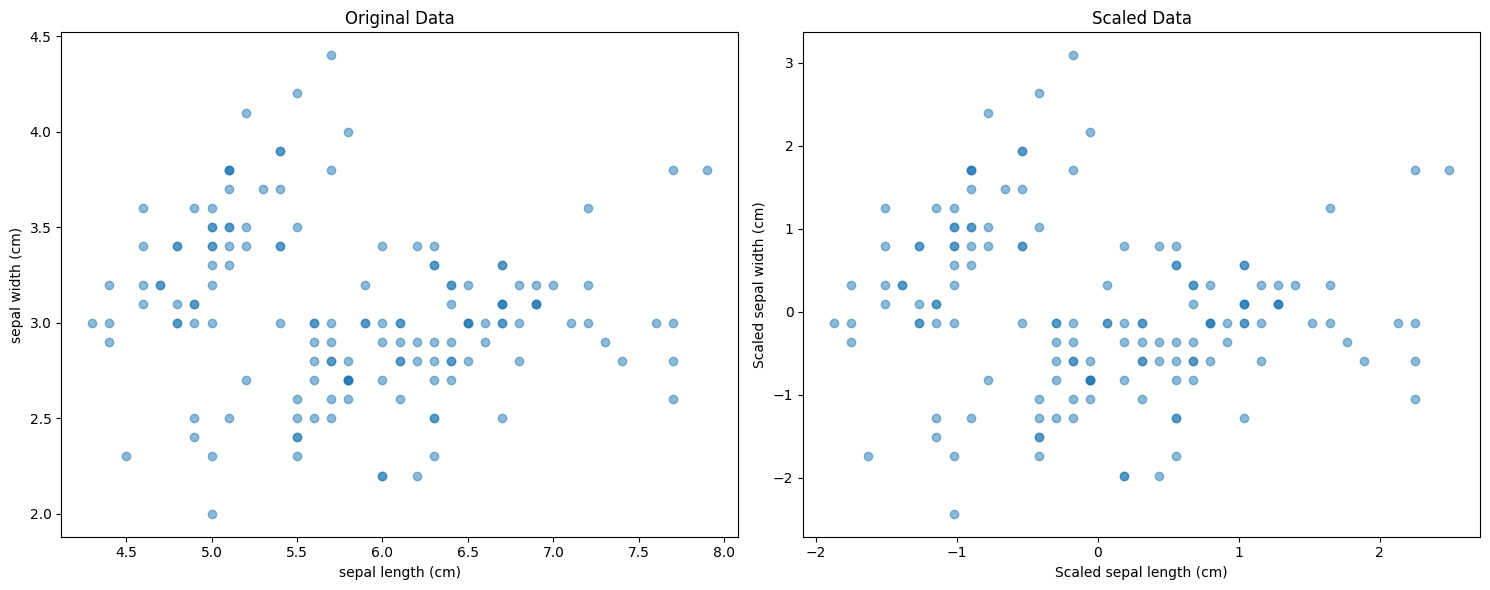

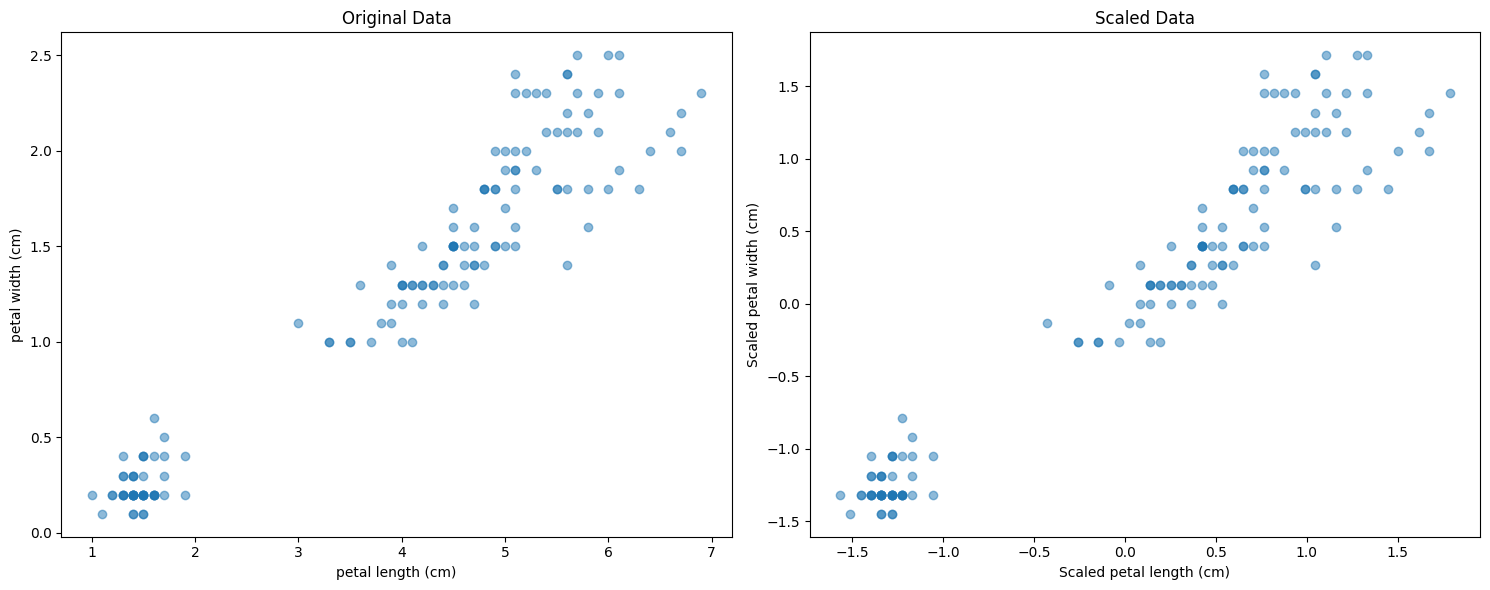

In [5]:
"""
Imported libraries
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

'''
set defaults parameters for plotting
'''

plt.rcdefaults()

'''
load in the iris dataset and store the data in X and the features in 
feature_names i presume X is nxm and the features are 1xm
'''

iris = load_iris()
X = iris.data
feature_names = iris.feature_names

'''
initialize an instance of the standard scaler object and use it to transform
the data. stored in X_data. the standard scaler is a linear transformation
that forces a data set (or columns of a matrix) to have mean 0 and variance 1.
'''

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

'''
make a 1 row and 2 columns subplot with size 15,6. the left (right) plot is 
stored in the tuple as ax1 (ax2).
'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

'''
scatter the first two columns of the untouched dataset together.
'''


ax1.scatter(X[:, 0], X[:, 1], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])

'''
scatter the first two columns of the scaled dataset together.
'''

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
ax2.set_title('Scaled Data')
ax2.set_xlabel(f'Scaled {feature_names[0]}')
ax2.set_ylabel(f'Scaled {feature_names[1]}')

'''
this helps make sure everything on the canvas has enough "elbow room".
'''

plt.tight_layout()

'''
same as plot structure above.
'''


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(X[:, 2], X[:, 3], alpha=0.5)
ax1.set_title('Original Data')
ax1.set_xlabel(feature_names[2])
ax1.set_ylabel(feature_names[3])

ax2.scatter(X_scaled[:, 2], X_scaled[:, 3], alpha=0.5)
ax2.set_title('Scaled Data')
ax2.set_xlabel(f'Scaled {feature_names[2]}')
ax2.set_ylabel(f'Scaled {feature_names[3]}')

plt.tight_layout()

'''
this is a good check to see the effect of the standard scaler. axis=0 means,
"apply this operation column-wise."
'''

print("Original data:")
print("Means:", np.mean(X, axis=0))
print("Standard deviations:", np.std(X, axis=0))

print("\nScaled data:")
print("Means:", np.mean(X_scaled, axis=0))
print("Standard deviations:", np.std(X_scaled, axis=0))

'''
this inverts the transformation back to the orginal form, in theory. you print
the max difference to demonstrate that there is some numerical instability,
although minor in this case.
'''

X_reconstructed = scaler.inverse_transform(X_scaled)

max_diff = np.max(np.abs(X - X_reconstructed))
print(f"\nMaximum difference between original and reconstructed data: {max_diff}")

# Homework Task: Comment on every line of this code, explaining what it does and why it's important.

✏️ **Answer:** Put your reflections in this cell

Are the scaling methods always injective?

---

## Part 5. Encoding (10 points)

🗒️ **Task:** In this problem, you will work with the Titanic dataset to explore and apply various encoding techniques for both categorical and numerical data. You'll analyze the impact of different encoding methods on data representation and visualization.

#### Instructions

1. **Data Acquisition and Setup**

   Comment the code to load the Titanic dataset and perform initial setup: see code below.

2. **Dataset Overview**

   Write a brief report (100-200 words) addressing the following:
   - What is the Titanic dataset?
   - What variables are included in the dataset?
   - Identify which variables are categorical and which are numerical.
   - Describe any missing or inconsistent data you observe.

3. **Basic Data Visualization**

   Run and comment the code to create some basic visualizations of the data: see code below.

   Interpret these visualizations in 1-2 sentences each.

4. **Encoding Techniques**

   For each of the following encoding techniques, apply them to appropriate variables in the dataset and _write a short explanation (50-100 words)_ of how the technique works and its potential impact on analysis. The code is given: you simply need to write in a markdown what the output means. 


In [6]:
'''
imported libraries
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

'''
use a url to grab data from the net, and load it in as a dataframe.
'''

# Load the dataset
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

'''
print some info about the dataset.
'''

# Display basic information about the dataset
print(df.info())
print(df.describe())

'''
isnull returns bools, sum adds them up where False is treated as non-zero.
'''

# Check for missing values
print(df.isnull().sum())

'''
show the first few rows of the dataset.
'''

# Display the first few rows
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min     

When you read in a dataset like this one, I highly recommend you always look at it with something as simple as:

In [7]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


✏️ **Answer:**

Part 5 Problem 2 :

This dataset contains statistics concerning the tragedy of the Titanic’s sinking. The variables include: Survived (binary, if the passenger survived), Pclass (passenger class, what class their ticket was), Name, Sex (given as male or female) , Age, Siblings/Spouses Aboard (how many siblings or spouses are aboard with a passenger), Parents/Children Aboard (how many parents or siblings are aboard with a passenger), and Fare (cost of ticket). All variables except name and sex are numerical. This means that name and sex are categorical and I could see how Pclass is categorical. There are no missing values and no inconsistencies jump out at me.

In [8]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

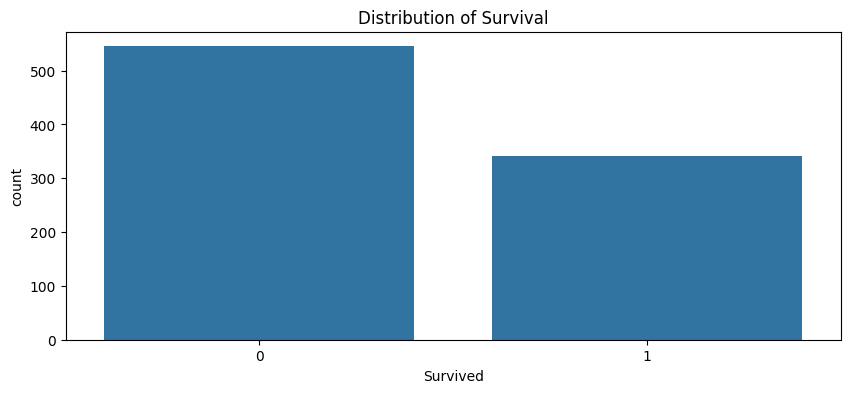

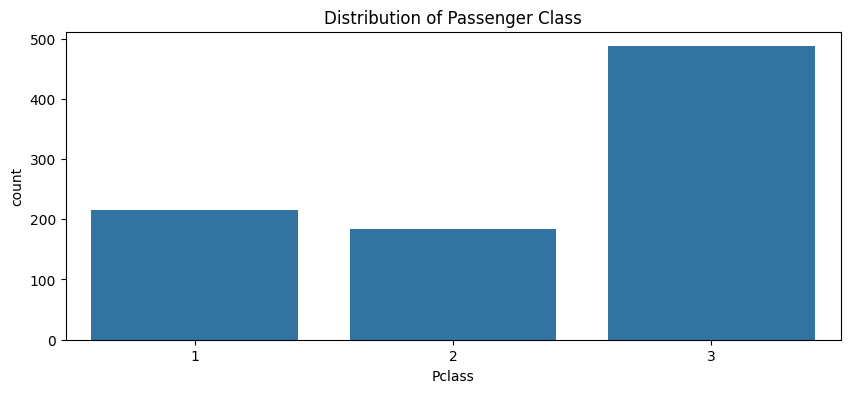

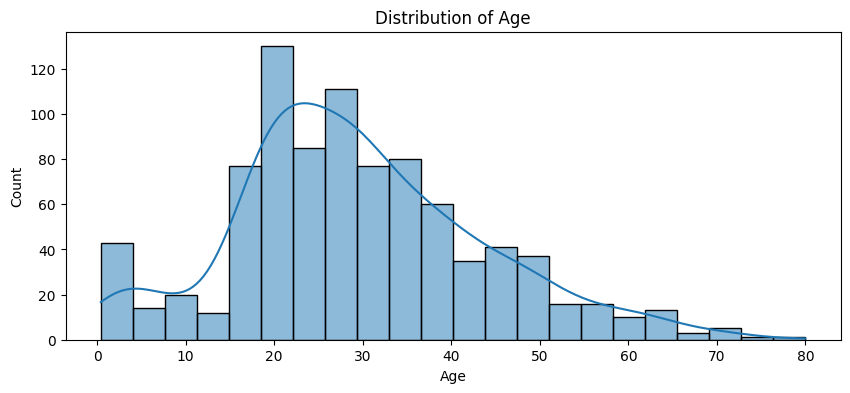

In [9]:
'''
a barplot routine in seaborn where one can pass the desired feature as x along
with the dataframe that contains it.
'''

 # Visualize the distribution of the 'Survived' variable
plt.figure(figsize=(10, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survival')
plt.show()

'''
same as above.
'''

# Visualize the distribution of 'Pclass'
plt.figure(figsize=(10, 4))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.show()

'''
a histogram routine showing the age of the passengers. dropna removes NaNs and
Nones from set. From the seaborn documentation: 

kde - bool

If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

'''

# Visualize the distribution of 'Age'
plt.figure(figsize=(10, 4))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()

✏️ **Answer:**

Part 5 Problem 3 : 

top plot : This bar plot gives the counts of the passengers who fit were recorded as 0 (perished) or 1 (survived). This plot tells us that more people perished than survived.

middle plot : Another bar plot but now we see the distribution of all the passenger's classes. This tells us that the most populated class was 3 (even when combining classes 1 and 2), and that there were marginally more passenger's in class 1 than class 2.

bottom plot : A histogram showing the age distribution of the passengers. The KDE parameter controls the routine's task of smoothing the distribution so that we might view it as a more continous set of data.

In [10]:
# one-hot encoding
onehot = OneHotEncoder()
encoded = onehot.fit_transform(df[['Pclass']])

# create feature names manually
unique_values = sorted(df['Pclass'].unique())
feature_names = [f'Pclass_{val}' for val in unique_values]

# convert to DataFrame
encoded_df = pd.DataFrame(encoded.toarray(), columns=feature_names)
print(encoded_df.head())

   Pclass_1  Pclass_2  Pclass_3
0       0.0       0.0       1.0
1       1.0       0.0       0.0
2       0.0       0.0       1.0
3       1.0       0.0       0.0
4       0.0       0.0       1.0


The one hot encoder here has represented the three types of Pclass as vectors where Pclass 1 and 2 can span the space but Pclass 2 is given as the null vector. I do not have much experiene with the method but I am concerned about how one would use this null vector to perform analysis.

In [11]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print(df[['Sex', 'Sex_encoded']].head())

      Sex  Sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


The label encoder has relabeled male as 1 and female as 0. This allows for easier use of the feature in computation as it is no longer a string of characters but a manipulatable vector of binary values. The interval in this case, as recorded at the time, is N=2 (for male or female) and so the encoder draws from [0,2-1]=[0,1].

In [12]:
oe = OrdinalEncoder()
df['Pclass_ordinal'] = oe.fit_transform(df[['Pclass']])
print(df[['Pclass', 'Pclass_ordinal']].head())

   Pclass  Pclass_ordinal
0       3             2.0
1       1             0.0
2       3             2.0
3       1             0.0
4       3             2.0


The ordinal encoder has assigned numerical integer (stored as a float) values to the elements of the Pclass column. The value reflects that item's order in the ordered column of Pclass. This is why Pclass 3 is relabeled to 2.0, Pclass 1 as 0.0, and Pclass 2 as 1.0 (not shown).

In [13]:
def custom_binary_encode(value):
    return format(value, '02b')

df['Pclass_binary'] = df['Pclass'].apply(custom_binary_encode)
print(df[['Pclass', 'Pclass_binary']].head())

   Pclass Pclass_binary
0       3            11
1       1            01
2       3            11
3       1            01
4       3            11


I see that the custom function is using the format function and will format the passed value according to the style. I know 'b' in this context usually means binary but I will copy and paste the custom fucntion into ChatGPT (ChatGPT 5.0, 06.09.25) and ask "what does '02b' mean in this context?". Ok, this formats the value as a binary with 0 padding and minimum width of 2.

In [14]:
freq_encoding = df.groupby('Pclass').size()/len(df)
df['Pclass_freq'] = df['Pclass'].map(freq_encoding)
print(df[['Pclass', 'Pclass_freq']].head())
print(df['Pclass_freq'].unique(),sum(df['Pclass_freq'].unique()))

   Pclass  Pclass_freq
0       3     0.549042
1       1     0.243517
2       3     0.549042
3       1     0.243517
4       3     0.549042
[0.54904171 0.24351747 0.20744081] 1.0


This custom encoder assigns each value in the Pclass column to a value reflecting how frequently it appears in the column. When one sums up the distinct values they sum to 1. This is implemented here by using groupby and scaling the length of the df against it. Then, one creates a frequency column and maps these new frequency values onto the Pclass column.

---
## Congratulations, you're done!

### 🛑 IMPORTANT: Before Submission

**STOP!** Before submitting your notebook, please follow these steps:

### Step 1: Restart Your Kernel

**Jupyter Notebook (Classic):**
- Go to `Kernel` → `Restart & Clear Output`

**JupyterLab:**
- Go to `Kernel` → `Restart Kernel and Clear All Outputs...`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Restart" and select `Jupyter: Restart`
- Then select `Clear All Output`

**PyCharm:**
- Go to `Run` → `Restart Kernel` (or click the restart button in the toolbar)
- Go to `Cell` → `All Output` → `Clear`

### Step 2: Run All Cells

**Jupyter Notebook (Classic):**
- Go to `Cell` → `Run All`

**JupyterLab:**
- Go to `Run` → `Run All Cells`

**VS Code:**
- Open Command Palette (`Ctrl+Shift+P` / `Cmd+Shift+P`)
- Type "Jupyter: Run All" and select `Jupyter: Run All Cells`

**PyCharm:**
- Go to `Cell` → `Run All` (or use `Ctrl+Shift+F10` / `Cmd+Shift+R`)

### Step 3: Verify Everything Works

Check that all cells execute without errors and produce the expected output

This ensures that your notebook will run correctly when graded and that you haven't missed any dependencies or variable definitions that might exist only in your current session.

*Your submission will be tested in a fresh environment, so this step is crucial for full credit!*


### Step 4: Submit 
Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "Homework" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!


&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.